# Loading the MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
d0 = pd.read_csv('E:/Data Science/Assignments/MNIST Dataset/train.csv/mnist_train.csv')
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
l = d0['label']
d = d0.drop('label',axis=1)

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


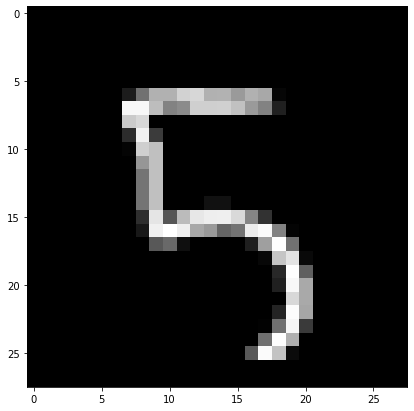

5


In [5]:
plt.figure(figsize=(7,7))
idx = 21968
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation='none',cmap='gray')
plt.show()

print(l[idx])

# 2D Visualization of using PCA

In [6]:
labels = l
data = d
print(data.shape)

(42000, 784)


**1. Data-preprocessing : Standardizing the data**

In [7]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(data)
print(standardised_data.shape)

(42000, 784)


**2. Find The CO-VARIANCE MATRIX which is : A^T * A**

In [8]:
sample_data = standardised_data
covar_matrix = np.matmul(sample_data.T , sample_data)
print("The shape of co-variance matrix is : ",covar_matrix.shape)

The shape of co-variance matrix is :  (784, 784)


**3. Finding the top two eigen-values and corresponding eigen vectors**

In [9]:
from scipy.linalg import eigh
# the parameter 'eigvals' is defined (low to high)
# eigh function will return the eigen values in ascending order
# this code generates only the top 2 (782 and 783) eigenvalues
values , vectors = eigh(covar_matrix, eigvals=(782,783)) 
print("Shape of eigen vectors =",vectors.shape)
#converting eigen vectors in (2,D) shape
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors = (784, 2)
Updated shape of eigen vectors =  (2, 784)


**4. Projecting the original data sample on the plane, formed by two principal eigen vectors by vector-vector multiplication.**

In [10]:
new_coordinates = np.matmul(vectors, sample_data.T)

print (" 'resultunt new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 'resultunt new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


**5. Creating Data Frame**

In [11]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


**6. Plotting 2d data frame with seaborn**

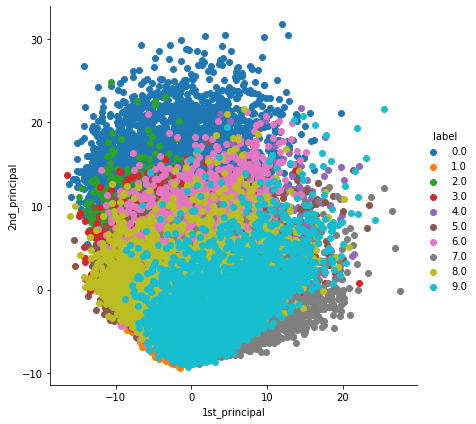

In [12]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA Using Scikit-Learn

In [13]:
from sklearn import decomposition
pca = decomposition.PCA()

**1. Configuring the parameters**

In [14]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


**2. Attaching the label for each 2-d data point**

In [15]:
pca_data = np.vstack((pca_data.T, labels)).T

**3. Creating a new data fram which help us in ploting the result data**

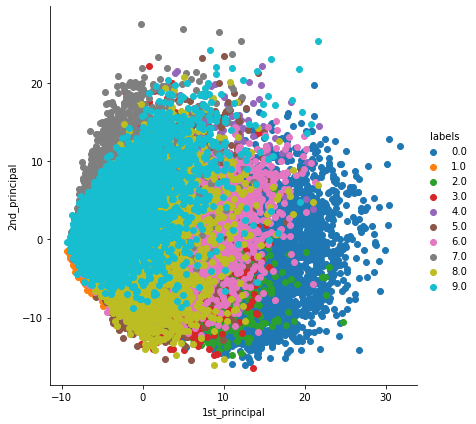

In [16]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "labels"))
sn.FacetGrid(pca_df, hue='labels', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

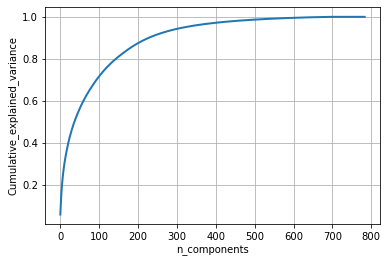

In [17]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE Using Scikit- Learn

In [18]:
from sklearn.manifold import TSNE

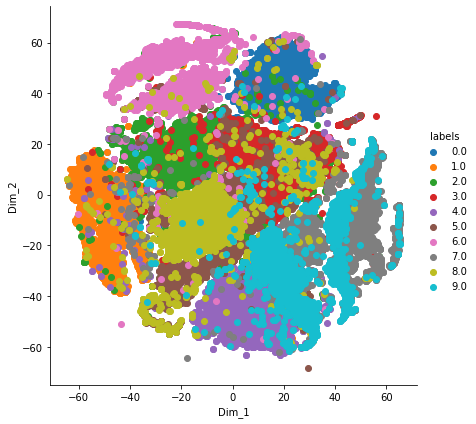

In [25]:
data = standardised_data
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

**Changing Perplexity to 50**

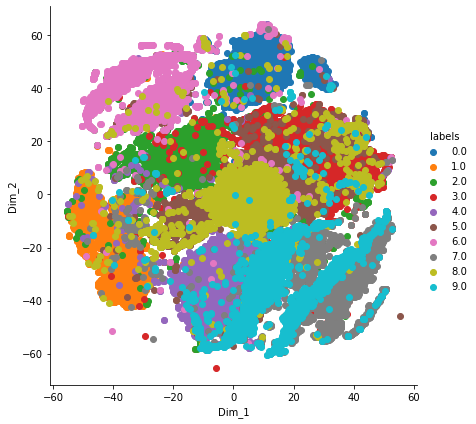

In [27]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))
sn.FacetGrid(tsne_df, hue="labels", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

**Changing Iterations Or Steps to 5000**

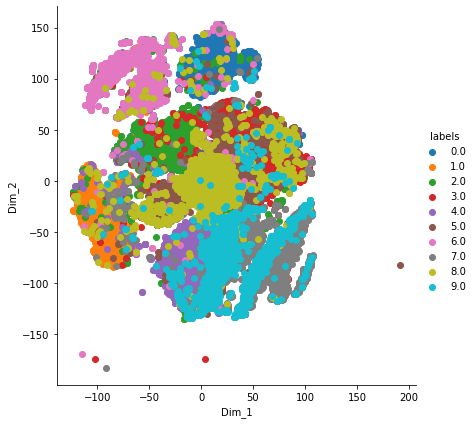

In [28]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))
sn.FacetGrid(tsne_df, hue="labels", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()